# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"
df = pd.read_csv(url)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()
df.describe().T
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

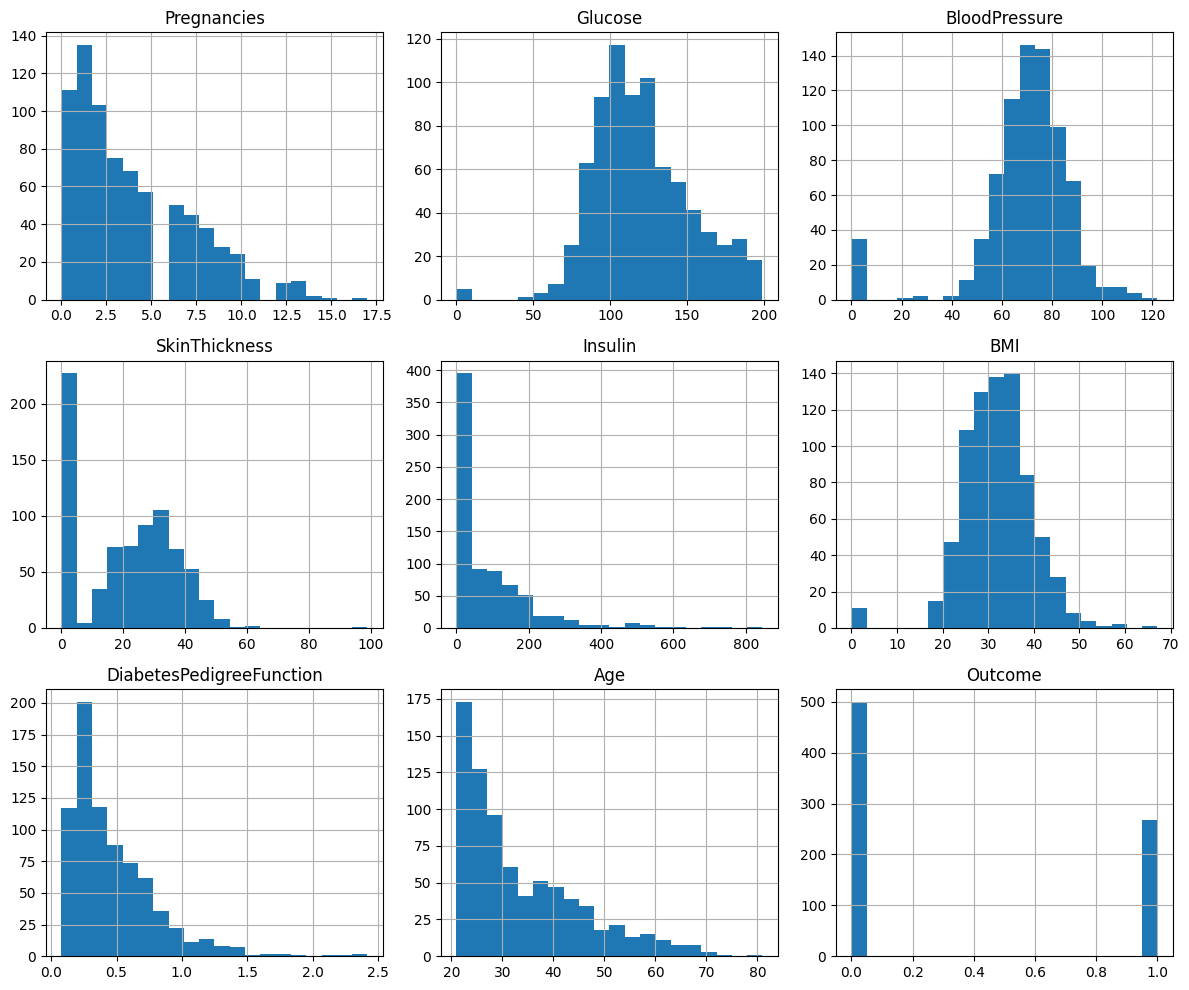

In [4]:
df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()


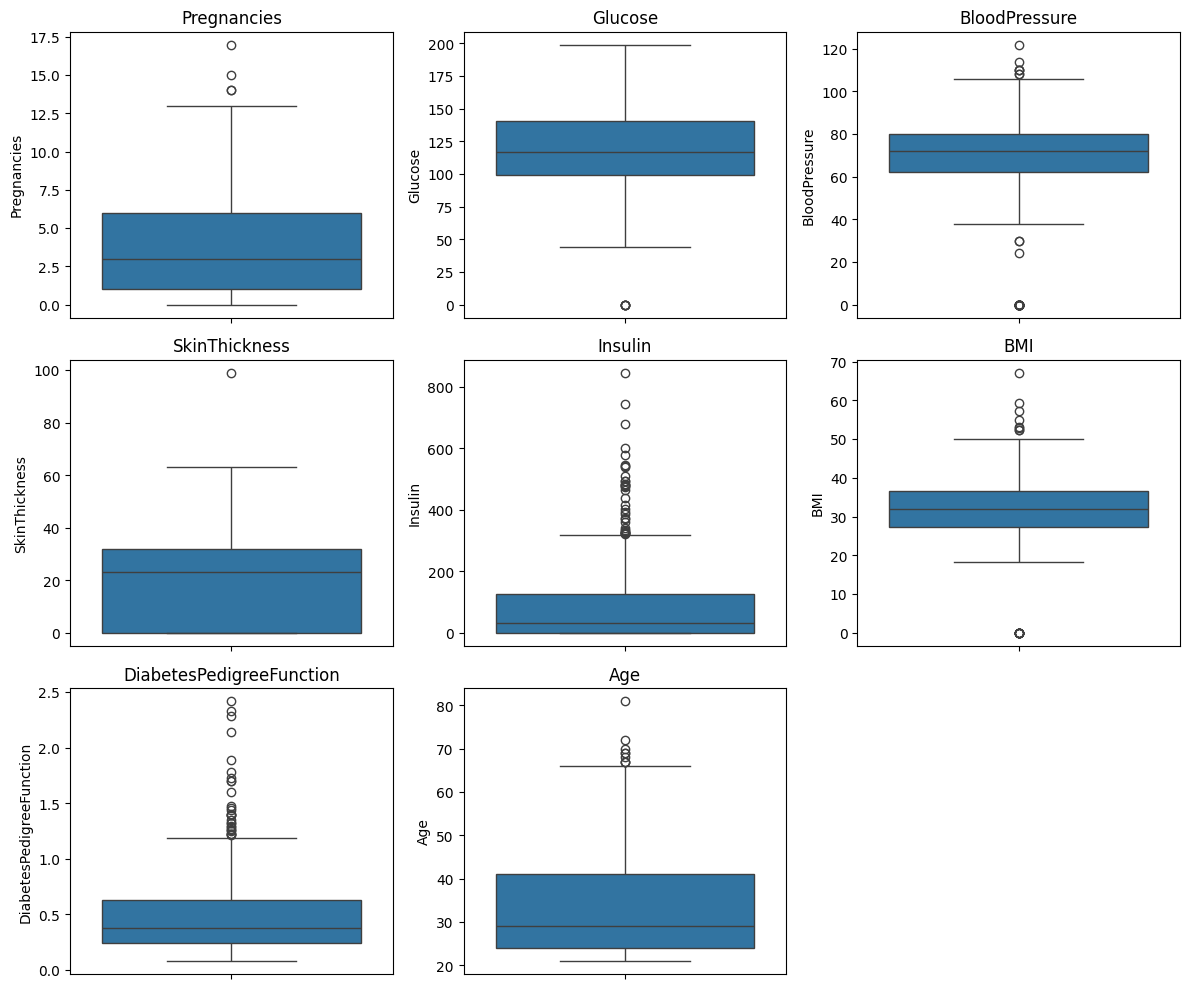

In [5]:
plt.figure(figsize=(12,10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


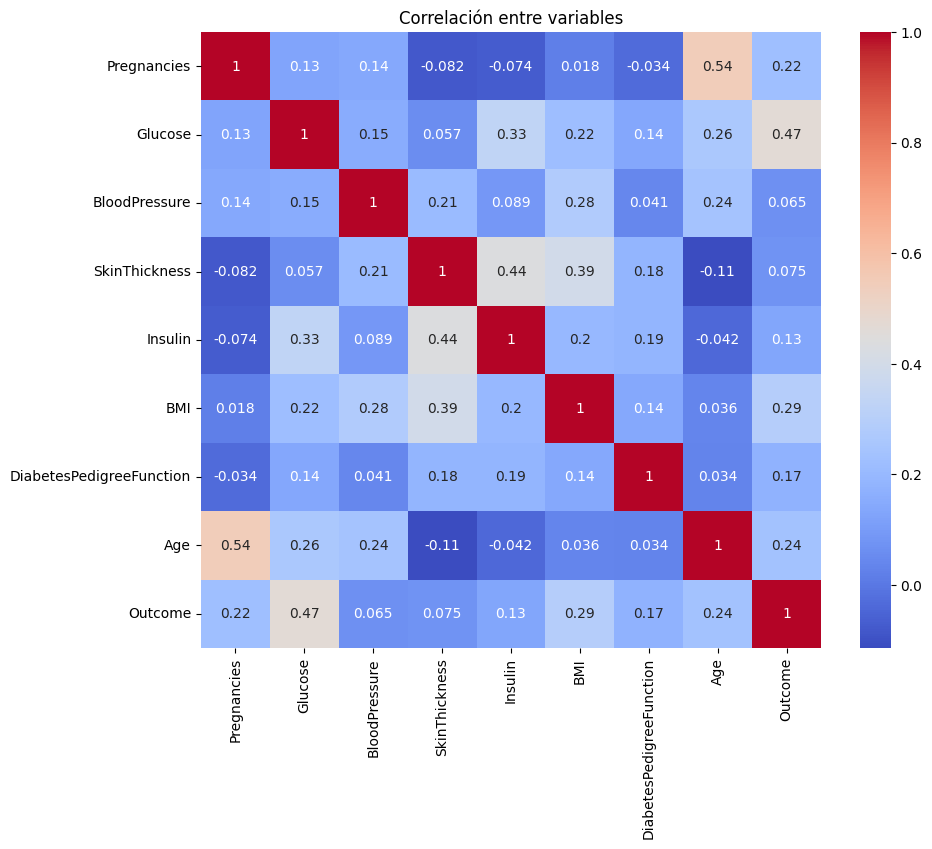

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()


In [7]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
def evaluar_modelo(model, X_test, y_test, title="Modelo"):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔹 {title} | Accuracy: {acc:.4f}\n")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de confusión ({title})")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()


🔹 Árbol (Gini) | Accuracy: 0.7468

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



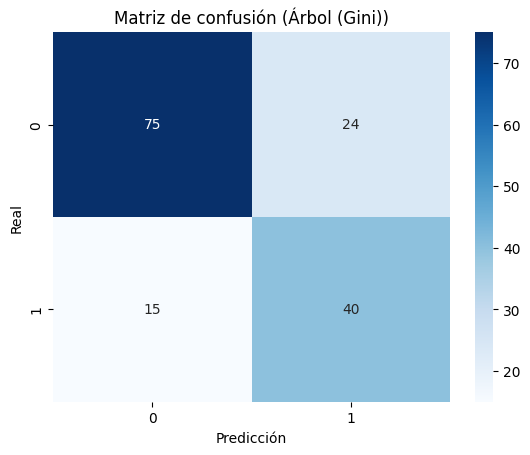

In [10]:
tree_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
tree_gini.fit(X_train, y_train)

evaluar_modelo(tree_gini, X_test, y_test, title="Árbol (Gini)")


🔹 Árbol (Entropy) | Accuracy: 0.7208

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



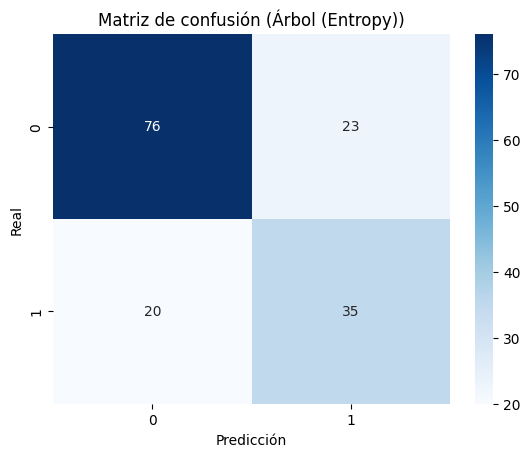

In [11]:
tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_entropy.fit(X_train, y_train)

evaluar_modelo(tree_entropy, X_test, y_test, title="Árbol (Entropy)")


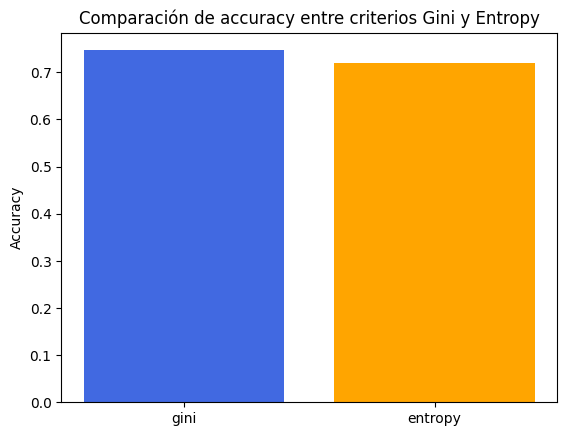

In [12]:
criterios = ["gini", "entropy"]
scores = []

for crit in criterios:
    model = DecisionTreeClassifier(criterion=crit, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.bar(criterios, scores, color=["royalblue", "orange"])
plt.title("Comparación de accuracy entre criterios Gini y Entropy")
plt.ylabel("Accuracy")
plt.show()


In [13]:
param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("🔍 Mejores hiperparámetros encontrados:")
print(grid.best_params_)

print("\n📈 Mejor accuracy:", grid.best_score_)


🔍 Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}

📈 Mejor accuracy: 0.767119818739171


🔹 Árbol Optimizado | Accuracy: 0.7792

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



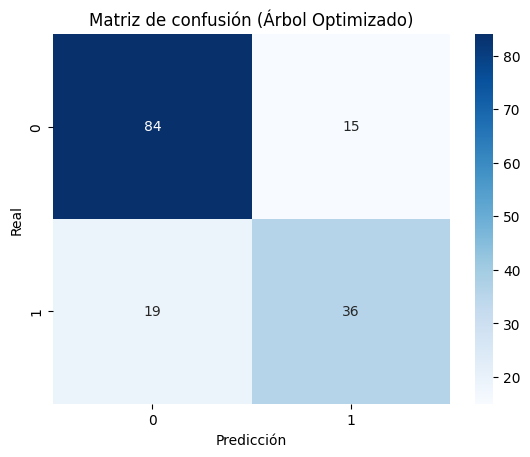

In [14]:
best_tree = grid.best_estimator_
evaluar_modelo(best_tree, X_test, y_test, title="Árbol Optimizado")


In [15]:
with open("modelo_diabetes_tree.pkl", "wb") as f:
    pickle.dump(best_tree, f)

print("✅ Modelo guardado como modelo_diabetes_tree.pkl")


✅ Modelo guardado como modelo_diabetes_tree.pkl
